# Page Rank Random Walk (Undireceted Graph)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
from random import choice

C:\Users\Sachin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


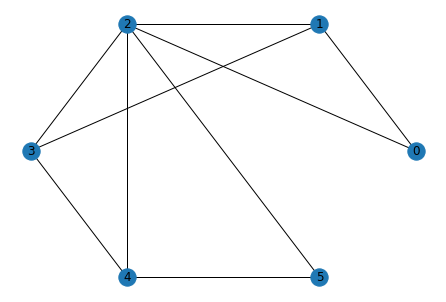

In [2]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(2,5)
G.add_edge(3,4)
G.add_edge(4,5)
nx.draw(G,pos = nx.circular_layout(G),with_labels=True)
plt.show()

In [3]:
def random_walk(G):
    nodes=G.nodes()
    print(nodes)
    print("Node Type: ",type(nodes))
    RW_points=[0 for i in range(G.number_of_nodes())]
    r=random.choice(list(nodes))
    print("r: ",r)
    RW_points[r] += 1
    out=G.edges(r)
    c=0
    while(c != 100000):
        if(len(out)==0):
            focus=random.choice(list(r))
        else:
            r1=random.choice(list(out))
            focus=r1[1]
        RW_points[focus]+=1
        out=G.edges(focus)
        c+=1
    return RW_points

Perform Random Walk.

In [4]:
RW_points=random_walk(G)
print("Random Walk Points: ",RW_points)

[0, 1, 2, 3, 4, 5]
Node Type:  <class 'networkx.classes.reportviews.NodeView'>
r:  3
Random Walk Points:  [10983, 16528, 27650, 16769, 16855, 11216]


In [5]:
def get_nodes_sorted_by_points(RW_points):
    points_array=np.array(RW_points)
    nodes_sorted_by_points=np.argsort(-points_array)
    return nodes_sorted_by_points

In [6]:
print("New points: ", RW_points)
nodes_sorted_by_points=get_nodes_sorted_by_points(RW_points)
print("Nodes sorted after some iteration: ",nodes_sorted_by_points)

New points:  [10983, 16528, 27650, 16769, 16855, 11216]
Nodes sorted after some iteration:  [2 4 3 1 5 0]


In [7]:
pr=nx.pagerank(G)
pr_sorted=sorted(pr.items(),key=lambda x:x[1], reverse=True)
print("Page rank: ",pr_sorted)
pr_list=[]
for i in pr_sorted:
    pr_list.append(i[0])
print("Sorted list: ",pr_list)

Page rank:  [(2, 0.26621269862391406), (4, 0.16692136626673557), (1, 0.16692136626673554), (3, 0.16484427006519495), (0, 0.11755014938870981), (5, 0.11755014938870978)]
Sorted list:  [2, 4, 1, 3, 0, 5]
